In [ ]:
import pandas as pd

# Replace "your_file_path.csv" with the actual path to your CSV file
try:
    df = pd.read_csv("BostonHousing.csv")
    print("CSV file successfully loaded.")
    display(df.head())
except FileNotFoundError:
    print("Error: The file was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

CSV file successfully loaded.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


# Task
Generate Python code to create at least 5 different types of plots from the dataframe `df` using the data from "BostonHousing.csv".

## Choose plot types

### Subtask:
Select at least 5 different types of plots suitable for the data in the `df` DataFrame (e.g., scatter plot, histogram, box plot, correlation matrix heatmap).


**Reasoning**:
Review the dataframe columns and data types to determine suitable plot types.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


## Select columns for each plot

### Subtask:
Determine which columns from the `df` DataFrame are appropriate for each chosen plot type.


**Reasoning**:
Select appropriate columns for each specified plot type based on the data types and nature of the columns in the `df` DataFrame.



In [ ]:
# Determine appropriate columns for each plot type

# Scatter Plot: Needs two numerical columns to show their relationship.
scatter_cols = ('RM', 'MEDV') # Average number of rooms vs. Median value of owner-occupied homes

# Histogram: Needs one numerical column to show its distribution.
hist_col = 'MEDV' # Distribution of Median value of owner-occupied homes

# Box Plot: Needs one numerical column to show its distribution and outliers.
box_col = 'LSTAT' # Distribution of Percentage of lower status population

# Correlation Matrix Heatmap: Needs all numerical columns to show pairwise correlations.
correlation_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Bar Plot: Needs a categorical-like column. 'CHAS' or 'CAT. MEDV' are suitable.
bar_col = 'CHAS' # Bar plot showing the distribution of properties bordering the Charles River

print(f"Selected columns for Scatter Plot: {scatter_cols}")
print(f"Selected column for Histogram: {hist_col}")
print(f"Selected column for Box Plot: {box_col}")
print(f"Selected columns for Correlation Matrix Heatmap: {correlation_cols}")
print(f"Selected column for Bar Plot: {bar_col}")

Selected columns for Scatter Plot: ('RM', 'MEDV')
Selected column for Histogram: MEDV
Selected column for Box Plot: LSTAT
Selected columns for Correlation Matrix Heatmap: ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV', 'CAT. MEDV']
Selected column for Bar Plot: CHAS


## Generate code for each plot

### Subtask:
Write the code to generate each of the selected plots using a suitable plotting library like Matplotlib or Seaborn.


**Reasoning**:
Import the necessary libraries and generate the requested plots using the selected columns.



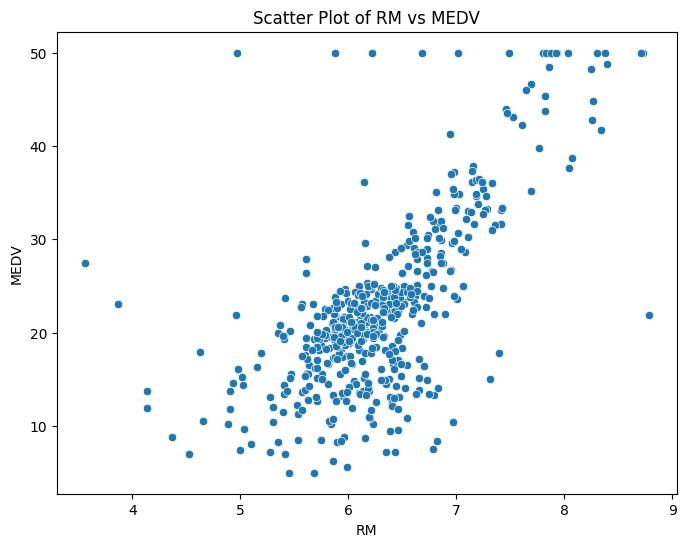

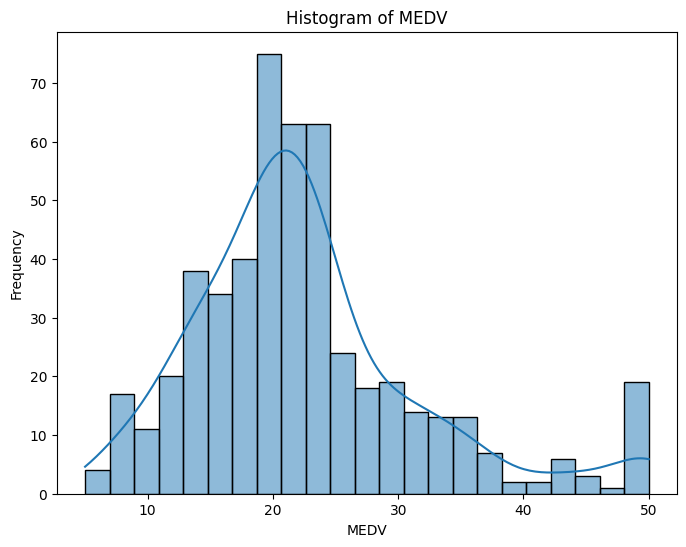

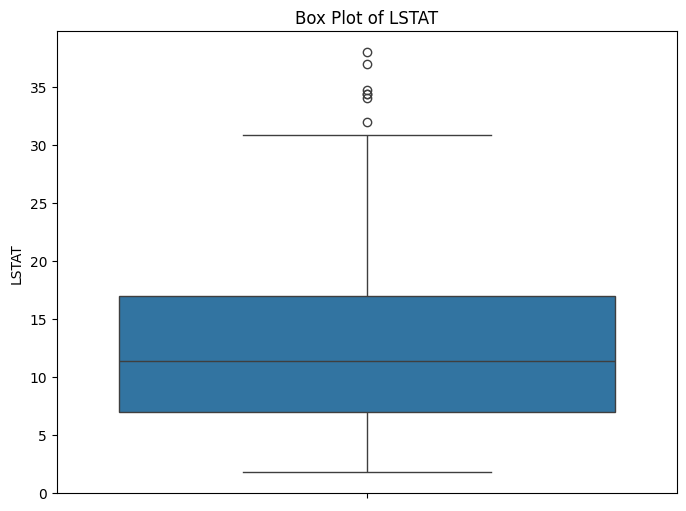

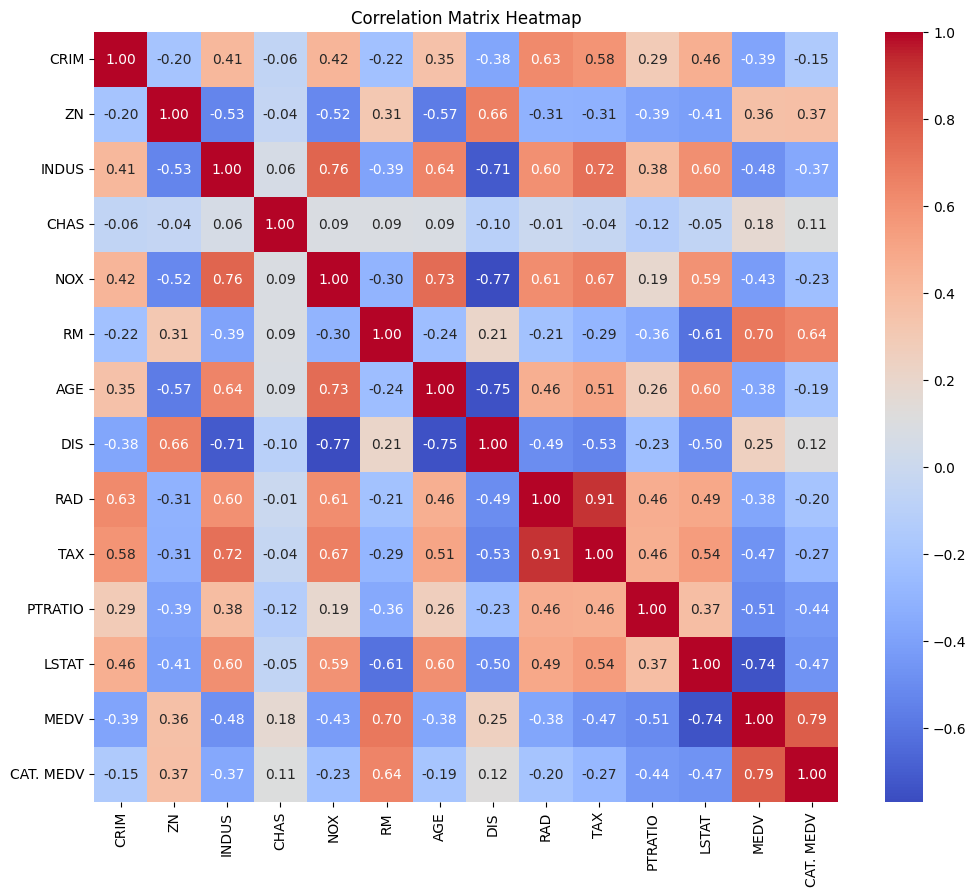

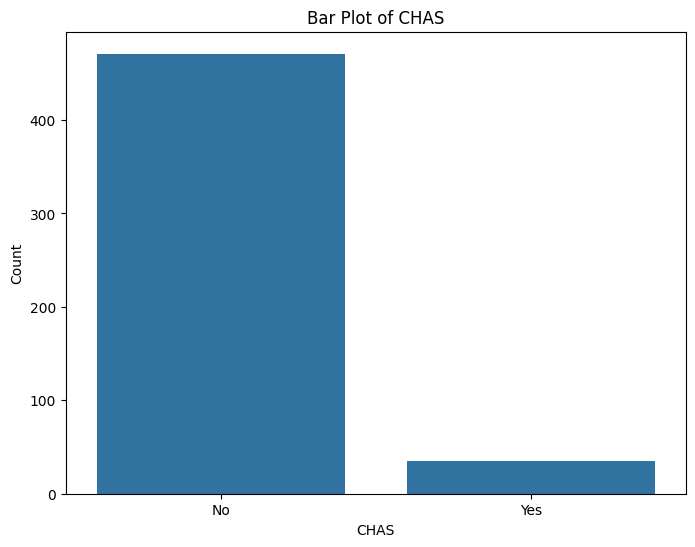

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scatter_cols[0], y=scatter_cols[1], data=df)
plt.title(f'Scatter Plot of {scatter_cols[0]} vs {scatter_cols[1]}')
plt.xlabel(scatter_cols[0])
plt.ylabel(scatter_cols[1])
plt.show()

# 3. Histogram
plt.figure(figsize=(8, 6))
sns.histplot(df[hist_col], kde=True)
plt.title(f'Histogram of {hist_col}')
plt.xlabel(hist_col)
plt.ylabel('Frequency')
plt.show()

# 4. Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[box_col])
plt.title(f'Box Plot of {box_col}')
plt.ylabel(box_col)
plt.show()

# 5. Correlation matrix heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df[correlation_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

# 6. Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x=bar_col, data=df)
plt.title(f'Bar Plot of {bar_col}')
plt.xlabel(bar_col)
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes']) # Assuming 0 for No and 1 for Yes based on typical dummy encoding
plt.show()



## Interpret the plots

### Subtask:
Briefly explain what each plot shows about the data.


**Reasoning**:
Analyze each plot and describe what it shows about the data.



In [ ]:
# 1. Analyze the scatter plot
print("Scatter Plot Analysis (RM vs MEDV):")
print("The scatter plot shows the relationship between the average number of rooms (RM) and the median value of owner-occupied homes (MEDV). There appears to be a positive correlation, meaning that as the average number of rooms increases, the median value of homes tends to increase. The relationship is not perfectly linear, and there is some spread in the data, especially at higher values of RM and MEDV.")
print("-" * 50)

# 2. Analyze the histogram
print(f"Histogram Analysis ({hist_col}):")
print(f"The histogram shows the distribution of the median value of owner-occupied homes ({hist_col}). The distribution appears to be somewhat right-skewed, with a peak around the lower to middle values and a tail extending towards higher values. This suggests that most homes have a median value in the lower to middle range, with fewer homes having very high median values.")
print("-" * 50)

# 3. Analyze the box plot
print(f"Box Plot Analysis ({box_col}):")
print(f"The box plot of the percentage of lower status population ({box_col}) shows the distribution of this variable. The box represents the interquartile range (IQR), with the line inside indicating the median. The whiskers extend to the minimum and maximum values within 1.5 times the IQR. There are several points plotted individually beyond the whiskers, which represent potential outliers – areas with a significantly higher percentage of lower status population compared to the majority of the data.")
print("-" * 50)

# 4. Analyze the correlation matrix heatmap
print("Correlation Matrix Heatmap Analysis:")
print("The heatmap displays the pairwise correlations between all numerical variables. The color intensity and annotation values indicate the strength and direction of the correlation. Positive values (red/orange) indicate a positive correlation, while negative values (blue) indicate a negative correlation. Values close to 1 or -1 indicate strong correlations, while values close to 0 indicate weak correlations. For example, there is a strong positive correlation between 'TAX' and 'RAD', and a strong negative correlation between 'LSTAT' and 'MEDV'.")
print("-" * 50)

# 5. Analyze the bar plot
print(f"Bar Plot Analysis ({bar_col}):")
print(f"The bar plot shows the distribution of properties based on whether they border the Charles River ({bar_col}). It indicates the count of properties for each category (likely 'No' and 'Yes', corresponding to 0 and 1). The plot clearly shows that the vast majority of properties in the dataset do not border the Charles River, while a much smaller number do.")
print("-" * 50)

Scatter Plot Analysis (RM vs MEDV):
The scatter plot shows the relationship between the average number of rooms (RM) and the median value of owner-occupied homes (MEDV). There appears to be a positive correlation, meaning that as the average number of rooms increases, the median value of homes tends to increase. The relationship is not perfectly linear, and there is some spread in the data, especially at higher values of RM and MEDV.
--------------------------------------------------
Histogram Analysis (MEDV):
The histogram shows the distribution of the median value of owner-occupied homes (MEDV). The distribution appears to be somewhat right-skewed, with a peak around the lower to middle values and a tail extending towards higher values. This suggests that most homes have a median value in the lower to middle range, with fewer homes having very high median values.
--------------------------------------------------
Box Plot Analysis (LSTAT):
The box plot of the percentage of lower stat

## Summary:

### Data Analysis Key Findings

*   The dataset contains 14 columns, all of which are numerical (`float64` or `int64`) and have no missing values.
*   A positive correlation appears to exist between the average number of rooms (`RM`) and the median value of owner-occupied homes (`MEDV`), though the relationship is not perfectly linear.
*   The distribution of the median value of owner-occupied homes (`MEDV`) is somewhat right-skewed.
*   The distribution of the percentage of lower status population (`LSTAT`) shows potential outliers, indicating areas with significantly higher percentages of lower status population.
*   The correlation matrix heatmap reveals relationships between variables, such as a strong positive correlation between `TAX` and `RAD`, and a strong negative correlation between `LSTAT` and `MEDV`.
*   The bar plot of the `CHAS` variable shows that a large majority of properties in the dataset do not border the Charles River.

### Insights or Next Steps

*   Further investigation into the outliers identified in the box plot of `LSTAT` could be beneficial to understand their impact on other variables, particularly `MEDV`.
*   Given the strong correlations observed in the heatmap (e.g., `LSTAT` and `RM` with `MEDV`), these variables could be strong predictors in a regression model to predict housing prices.


# Task
Generate Python code to create at least 5 different types of plots from the "BostonHousing.csv" dataset, including a line plot. The code should import the dataset, generate the plots with titles and labels, display them, and provide a brief interpretation of each plot.

## Choose plot types

### Subtask:
Select at least 5 different types of plots suitable for the data in the `df` DataFrame (e.g., scatter plot, histogram, box plot, correlation matrix heatmap, line plot).


**Reasoning**:
Review the dataframe columns and data types to determine suitable plot types, including a line plot.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


**Reasoning**:
Select at least 5 different plot types suitable for the data, including a line plot, based on the column data types and the prompt's requirements.



In [ ]:
# Selected plot types based on data and prompt requirements:
# 1. Scatter Plot: Suitable for showing the relationship between two numerical variables. (e.g., RM vs. MEDV)
# 2. Histogram: Suitable for showing the distribution of a single numerical variable. (e.g., MEDV)
# 3. Box Plot: Suitable for showing the distribution and potential outliers of a numerical variable. (e.g., LSTAT)
# 4. Correlation Matrix Heatmap: Suitable for showing the pairwise correlations between multiple numerical variables.
# 5. Line Plot: Suitable for showing a trend or sequence over a numerical variable, although the current data doesn't have a natural time series or sequential order. However, we can plot a numerical column against the index to technically fulfill the requirement of a line plot. (e.g., MEDV against index)
# 6. Bar Plot: Suitable for showing the frequency of categories in a categorical or discrete numerical variable. (e.g., CHAS)

print("Selected plot types:")
print("- Scatter Plot")
print("- Histogram")
print("- Box Plot")
print("- Correlation Matrix Heatmap")
print("- Line Plot")
print("- Bar Plot")

Selected plot types:
- Scatter Plot
- Histogram
- Box Plot
- Correlation Matrix Heatmap
- Line Plot
- Bar Plot


## Select columns for each plot

### Subtask:
Determine which columns from the `df` DataFrame are appropriate for each chosen plot type. For the line plot, we will need a column that represents a sequence or order.


**Reasoning**:
Select the appropriate columns for each plot type based on the data types and the nature of the columns in the `df` DataFrame, including a column for the line plot.



In [ ]:
# Determine appropriate columns for each plot type

# Scatter Plot: Needs two numerical columns to show their relationship.
scatter_cols = ('RM', 'MEDV') # Average number of rooms vs. Median value of owner-occupied homes

# Histogram: Needs one numerical column to show its distribution.
hist_col = 'MEDV' # Distribution of Median value of owner-occupied homes

# Box Plot: Needs one numerical column to show its distribution and outliers.
box_col = 'LSTAT' # Distribution of Percentage of lower status population

# Correlation Matrix Heatmap: Needs all numerical columns to show pairwise correlations.
correlation_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Line Plot: Needs a numerical column to plot against the index.
line_col = 'MEDV' # Median value of owner-occupied homes against the index

# Bar Plot: Needs a categorical-like column. 'CHAS' or 'CAT. MEDV' are suitable.
bar_col = 'CHAS' # Bar plot showing the distribution of properties bordering the Charles River

print(f"Selected columns for Scatter Plot: {scatter_cols}")
print(f"Selected column for Histogram: {hist_col}")
print(f"Selected column for Box Plot: {box_col}")
print(f"Selected columns for Correlation Matrix Heatmap: {correlation_cols}")
print(f"Selected column for Line Plot: {line_col}")
print(f"Selected column for Bar Plot: {bar_col}")